<a href="https://colab.research.google.com/github/nagashreem363/Dynamic_pricing/blob/main/EDA_of_WallMart_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis for Dynamic Pricing Strategies**

1. Data Loading
1. Data Preprocessing
2. EDA




**Data Loading**

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_data=pd.read_csv('/content/walmart_data_updated.csv')
raw_data.sample(4)

,SHIPPING_LOCATION,State,Country,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,Month,Season
1083,10001,NY,New York County,Bakery,Cakes,NaN,Bakery/Cakes,480813248,https://www.walmart.com/ip/Vanilla-Cake,"Duncan Hines Vanilla Cake, 15 Oz",Duncan Hines,5.99,5.99,15,Regular,03-05-2022,5,Spring
2819,10001,NY,New York County,Snacks,Nuts & Seeds,NaN,Snacks/Nuts & Seeds,594910897,https://www.walmart.com/ip/Sunflower-Seeds,"David Sunflower Seeds, 8 Oz",David,3.49,3.49,8,Regular,26-04-2022,4,Spring
6482,10001,NY,New York County,Frozen Foods,Ice Cream,NaN,Frozen Foods/Ice Cream,577547775,https://www.walmart.com/ip/Vanilla-Ice-Cream,"Haagen-Dazs Vanilla Ice Cream, 14 Oz",Haagen-Dazs,4.99,4.99,14,Summer Premium,29-08-2022,8,Summer
385,79936,TX,El Paso County,Deli,Prepared Meals,NaN,Deli/Prepared Meals,180045719,https://www.walmart.com/ip/Beef-Stroganoff,"Stouffer's Beef Stroganoff, 12 Oz",Stouffer's,4.99,4.99,12,Regular,30-09-2022,9,Fall


we observe that "SUBCATEGORY" HAS MISSING VALUES

In [ ]:
raw_data.info()
raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SHIPPING_LOCATION  10000 non-null  int64  
 1   State              10000 non-null  object 
 2   Country            10000 non-null  object 
 3   DEPARTMENT         10000 non-null  object 
 4   CATEGORY           10000 non-null  object 
 5   SUBCATEGORY        0 non-null      float64
 6   BREADCRUMBS        10000 non-null  object 
 7   SKU                10000 non-null  int64  
 8   PRODUCT_URL        10000 non-null  object 
 9   PRODUCT_NAME       10000 non-null  object 
 10  BRAND              10000 non-null  object 
 11  PRICE_RETAIL       10000 non-null  float64
 12  PRICE_CURRENT      10000 non-null  float64
 13  PRODUCT_SIZE       10000 non-null  int64  
 14  PROMOTION          10000 non-null  object 
 15  RunDate            10000 non-null  object 
 16  Month              1000

,0
SHIPPING_LOCATION,0
State,0
Country,0
DEPARTMENT,0
CATEGORY,0
SUBCATEGORY,10000
BREADCRUMBS,0
SKU,0
PRODUCT_URL,0
PRODUCT_NAME,0


As subcategory column is completely null, I plan to remove this in the current analysis as it don’t not add any value


**Data Preprocessing**

In [ ]:
columns_to_keep=["SHIPPING_LOCATION","DEPARTMENT","CATEGORY","SKU","PRODUCT_NAME","Country","State","PRODUCT_SIZE","BRAND","PRICE_RETAIL","PRICE_CURRENT","RunDate","PROMOTION","Season"]

In [ ]:
raw_data=raw_data[columns_to_keep]
raw_data.sample(3)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SKU,PRODUCT_NAME,Country,State,PRODUCT_SIZE,BRAND,PRICE_RETAIL,PRICE_CURRENT,RunDate,PROMOTION,Season
4444,10001,Deli,"Hummus, Dips, & Salsa",989993015,"Marketside Roasted Red Pepper Hummus, 10 Oz",New York County,NY,10,Marketside,2.67,2.67,25-12-2022,Regular,Winter
8572,90001,Snacks,Chips,672249357,"Lay's Potato Chips, 8 Oz",Los Angeles County,CA,8,Lay's,2.99,2.99,08-01-2022,Regular,Winter
505,30301,Beverages,Water,513597364,"Nestle Purified Water, 24 Pack",Fulton County,GA,24,Nestle,4.99,4.99,03-03-2022,Regular,Spring


Converting the datatype of 'RunDate' from object to Datetime

In [ ]:
raw_data['RunDate'] = pd.to_datetime(raw_data['RunDate'], format='%d-%m-%Y')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SHIPPING_LOCATION  10000 non-null  int64         
 1   DEPARTMENT         10000 non-null  object        
 2   CATEGORY           10000 non-null  object        
 3   SKU                10000 non-null  int64         
 4   PRODUCT_NAME       10000 non-null  object        
 5   Country            10000 non-null  object        
 6   State              10000 non-null  object        
 7   PRODUCT_SIZE       10000 non-null  int64         
 8   BRAND              10000 non-null  object        
 9   PRICE_RETAIL       10000 non-null  float64       
 10  PRICE_CURRENT      10000 non-null  float64       
 11  RunDate            10000 non-null  datetime64[ns]
 12  PROMOTION          10000 non-null  object        
 13  Season             10000 non-null  object        
dtypes: date

Extracting Month and year columns

In [ ]:
raw_data['month_name'] = raw_data['RunDate'].dt.strftime('%B')
raw_data['year'] = raw_data['RunDate'].dt.year

raw_data.sample(3)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SKU,PRODUCT_NAME,Country,State,PRODUCT_SIZE,BRAND,PRICE_RETAIL,PRICE_CURRENT,RunDate,PROMOTION,Season,month_name,year
6335,10001,Bakery,Bread,837334536,"Wonder White Bread, 20 Oz",New York County,NY,20,Wonder,2.49,2.49,2022-02-11,Regular,Winter,February,2022
6558,30301,Beverages,Water,738756912,"Poland Spring Spring Water, 24 Pack",Fulton County,GA,24,Poland Spring,4.99,4.99,2022-11-28,Regular,Fall,November,2022
3685,10001,Deli,"Hummus, Dips, & Salsa",706998999,"Marketside Roasted Red Pepper Hummus, 10 Oz",New York County,NY,10,Marketside,2.67,2.67,2022-01-02,Regular,Winter,January,2022


In [ ]:
raw_data.to_csv('cleaned_data.csv',index=False)

In [ ]:
cleaned_data=pd.read_csv('/content/cleaned_data.csv')
cleaned_data.sample(3)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SKU,PRODUCT_NAME,Country,State,PRODUCT_SIZE,BRAND,PRICE_RETAIL,PRICE_CURRENT,RunDate,PROMOTION,Season,month_name,year
8654,30301,Bakery,Pastries,321654240,"Entenmann's Danish Pastry, 12 Oz",Fulton County,GA,12,Entenmann's,4.99,4.99,2022-11-17,Regular,Fall,November,2022
7997,79936,Beverages,Soda,105140472,"Sprite Lemon-Lime Soda, 2 L",El Paso County,TX,2,Sprite,1.99,1.99,2022-07-25,Regular,Summer,July,2022
6308,60601,Deli,Prepared Meals,604267145,"Stouffer's Chicken Alfredo, 12 Oz",Cook County,IL,12,Stouffer's,4.99,4.99,2022-09-16,Regular,Fall,September,2022


**EXPLORATORY DATA ANALYSIS**

In [ ]:
cleaned_data.describe()

,SHIPPING_LOCATION,SKU,PRODUCT_SIZE,PRICE_RETAIL,PRICE_CURRENT,year
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,53904.508000,5.508995e+08,17.378300,4.186088,4.186088,2022.003000
std,29923.651503,2.609992e+08,15.233069,1.511101,1.511101,0.054693
min,10001.000000,1.001516e+08,2.000000,1.990000,1.990000,2022.000000
25%,30301.000000,3.210946e+08,8.000000,2.990000,2.990000,2022.000000
50%,60601.000000,5.536592e+08,12.000000,3.990000,3.990000,2022.000000
75%,79936.000000,7.784117e+08,20.000000,4.990000,4.990000,2022.000000
max,90001.000000,9.999775e+08,64.000000,7.490000,7.490000,2023.000000


1.PRODUCT_SIZE ranges from 2 to 64 indicating significant variation in product dimensions or quantities.

2.PRICE_RETAIL and PRICE_CURRENT have identical summary statistics, suggesting no recent changes in pricing.

In [ ]:
cleaned_data['Country'].unique()
#We can observe that there are 5 Unique Countries

array(['Los Angeles County', 'Fulton County', 'El Paso County',
       'New York County', 'Cook County'], dtype=object)

In [ ]:
cleaned_data['State'].unique()
#We can observe that there are 5 Unique States

array(['CA', 'GA', 'TX', 'NY', 'IL'], dtype=object)

In [ ]:
cleaned_data['DEPARTMENT'].unique()
 #Various Departments in Our walmart data


array(['Deli', 'Beverages', 'Bakery', 'Frozen Foods', 'Snacks'],
      dtype=object)

In [ ]:
cleaned_data['CATEGORY'].unique()
 #Various Categories in Our walmart data

array(['Prepared Meals', 'Juice', 'Cakes', 'Ice Cream', 'Pastries',
       'Frozen Vegetables', 'Soda', 'Frozen Meals', 'Cheese', 'Cookies',
       'Chips', 'Hummus, Dips, & Salsa', 'Nuts & Seeds', 'Bread', 'Water'],
      dtype=object)

In [ ]:
cleaned_data['CATEGORY'].value_counts()

,count
CATEGORY,
Prepared Meals,696
Frozen Vegetables,693
Cheese,688
Water,688
Soda,677
Juice,676
Cakes,675
Frozen Meals,673
Cookies,665


In [ ]:
cleaned_data['BRAND'].unique()  #various brands

array(["Stouffer's", 'Tropicana', 'Duncan Hines', 'Haagen-Dazs',
       "Entenmann's", 'Birds Eye', 'Coca-Cola', 'El Monterey', 'DiGiorno',
       'Sargento', 'Breyers', 'Chips Ahoy', 'Pillsbury', 'Sprite',
       'Tostitos', "Mott's", 'Marketside', 'Green Giant', 'David',
       'Betty Crocker', 'Wonder', 'Poland Spring', 'Blue Diamond',
       'Kraft', 'Quaker', 'Nestle', "Lay's", 'Arnold'], dtype=object)

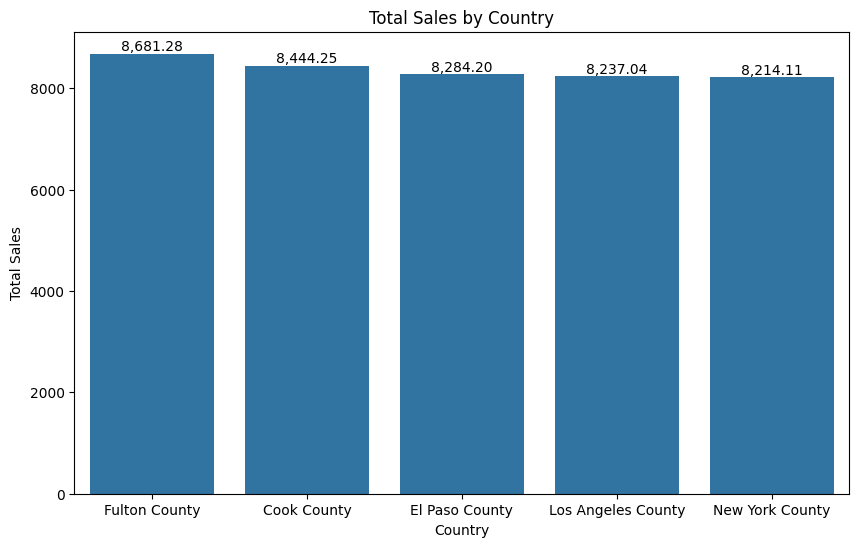

In [ ]:
country_sales = cleaned_data.groupby('Country')['PRICE_CURRENT'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=country_sales.index, y=country_sales.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

By this graph we observe that Fulton Country and Cook Country has the highest sales

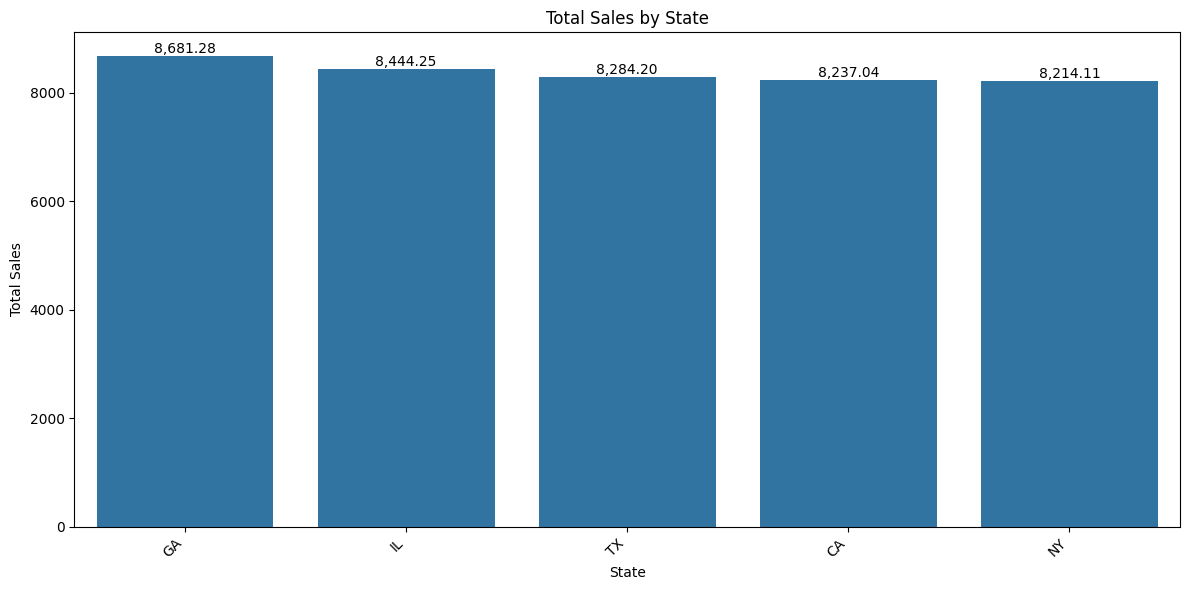

In [ ]:
state_sales = cleaned_data.groupby('State')['PRICE_CURRENT'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=state_sales.index, y=state_sales.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Georgia and  Illinois are the states with highest sales


<ipython-input-24-1373105633>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Season', y='PRICE_CURRENT', data=sales_by_season, palette='viridis')


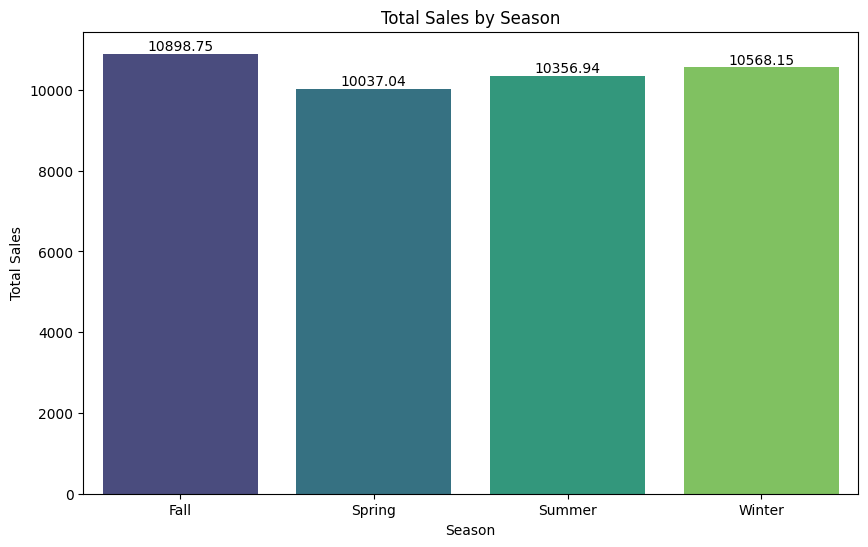

Season with the highest sales:
Season               Fall
PRICE_CURRENT    10898.75
Name: 0, dtype: object


In [ ]:
sales_by_season = cleaned_data.groupby('Season')['PRICE_CURRENT'].sum().reset_index()
highest_sales_season = sales_by_season.sort_values(by='PRICE_CURRENT', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='PRICE_CURRENT', data=sales_by_season, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()
print("Season with the highest sales:")
print(highest_sales_season.iloc[0])


The season with the highest total sales is Fall, with total sales of 10,898.75. This is followed by Winter (10,568.15), Summer (10,356.94), and Spring (10,037.04)

<ipython-input-25-2508728361>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=fall_category_counts.head(10), palette='viridis') # Showing top 10 categories


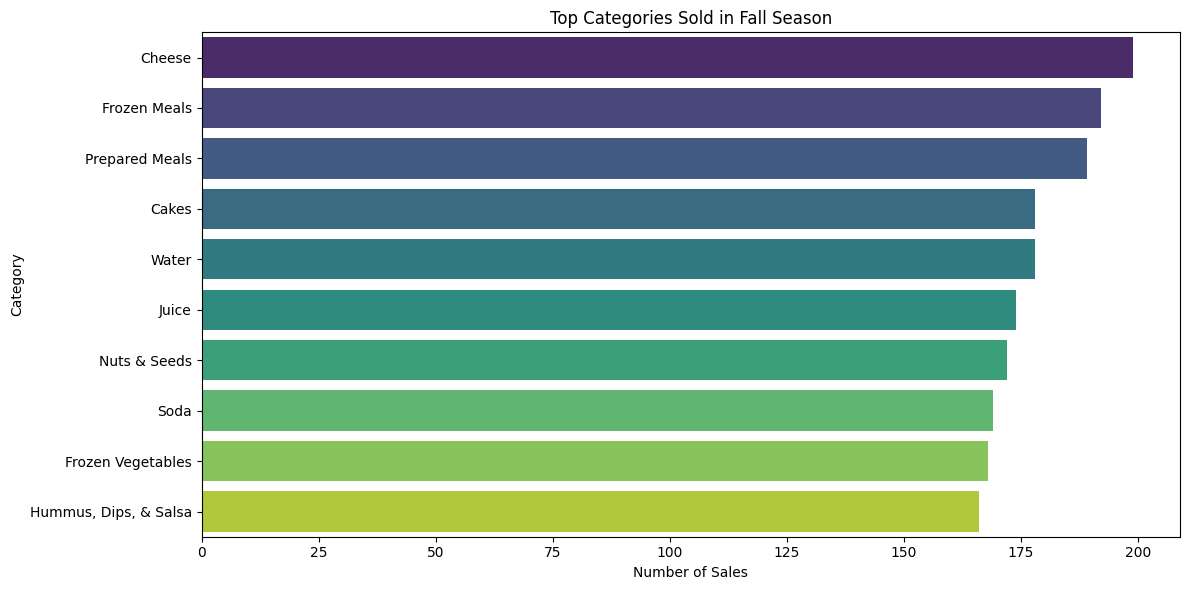

<ipython-input-25-2508728361>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Product', data=fall_product_counts.head(15), palette='magma') # Showing top 15 products


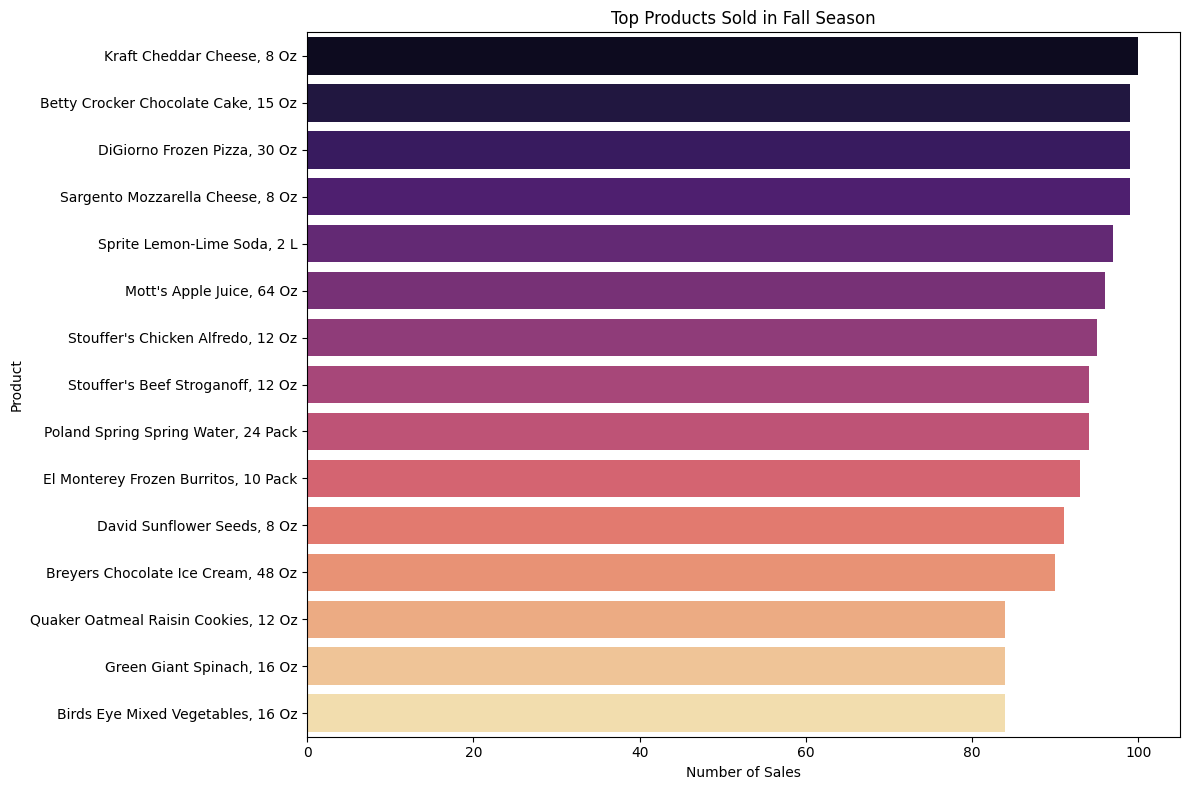

In [ ]:
fall_data = cleaned_data[cleaned_data['Season'] == 'Fall']

# Count the occurrences of each category and product in Fall
fall_category_counts = fall_data['CATEGORY'].value_counts().reset_index()
fall_category_counts.columns = ['Category', 'Count']

fall_product_counts = fall_data['PRODUCT_NAME'].value_counts().reset_index()
fall_product_counts.columns = ['Product', 'Count']

# Plotting categories sold in Fall
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Category', data=fall_category_counts.head(10), palette='viridis') # Showing top 10 categories
plt.title('Top Categories Sold in Fall Season')
plt.xlabel('Number of Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Plotting products sold in Fall
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Product', data=fall_product_counts.head(15), palette='magma') # Showing top 15 products
plt.title('Top Products Sold in Fall Season')
plt.xlabel('Number of Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Top category and the Products sold in fall Season was'"cheese" and "Kraft Cheddar Cheese"

The category with the highest sales is: Frozen Meals
Total sales in this category: 4867.77


<ipython-input-26-421942905>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRICE_CURRENT', y='CATEGORY', data=top_categories, palette='viridis')


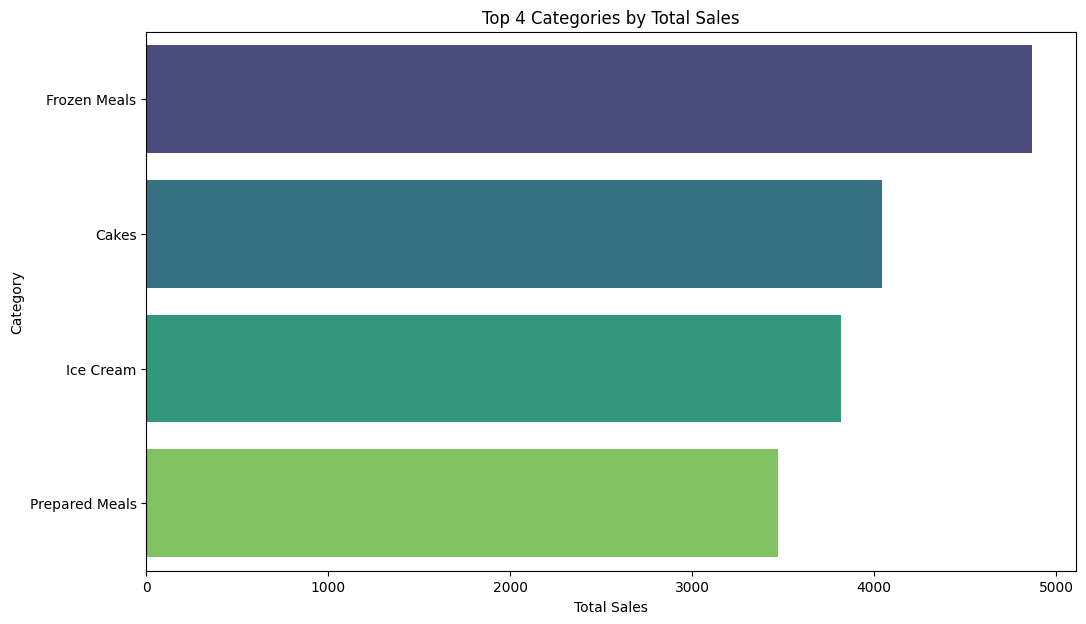

In [ ]:
category_sales = cleaned_data.groupby('CATEGORY')['PRICE_CURRENT'].sum().reset_index()
highest_sales_category = category_sales.sort_values(by='PRICE_CURRENT', ascending=False).iloc[0]

print(f"The category with the highest sales is: {highest_sales_category['CATEGORY']}")
print(f"Total sales in this category: {highest_sales_category['PRICE_CURRENT']:.2f}")
top_n =4
top_categories = category_sales.sort_values(by='PRICE_CURRENT', ascending=False).head(top_n)

plt.figure(figsize=(12, 7))
sns.barplot(x='PRICE_CURRENT', y='CATEGORY', data=top_categories, palette='viridis')
plt.title(f'Top {top_n} Categories by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

'Frozen Meals' and Cakes' are the top 2 categories sold in the year 2022


<ipython-input-27-625901390>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='year', y='PRICE_CURRENT', data=total_sales_by_year, palette='viridis')


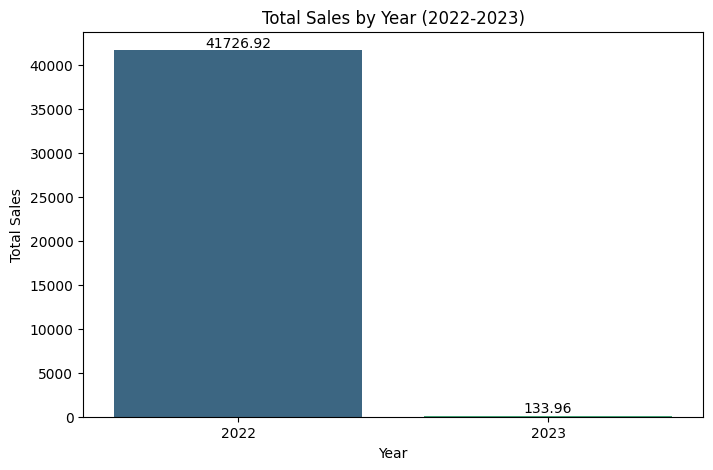

In [ ]:
sales_2022_2023 = cleaned_data[cleaned_data['year'].isin([2022, 2023])]
total_sales_by_year = sales_2022_2023.groupby('year')['PRICE_CURRENT'].sum().reset_index()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='year', y='PRICE_CURRENT', data=total_sales_by_year, palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Sales by Year (2022-2023)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0) # Ensure years are displayed horizontally
plt.show()

The sales data primarily represents the year 2022, with a total of 41,726.92 in sales. The value shown for 2023 (133.96) is extremely low, indicating that complete sales data for 2023 is not available. The recorded sales for 2023 likely represent only the beginning of the year, rather than the full period.

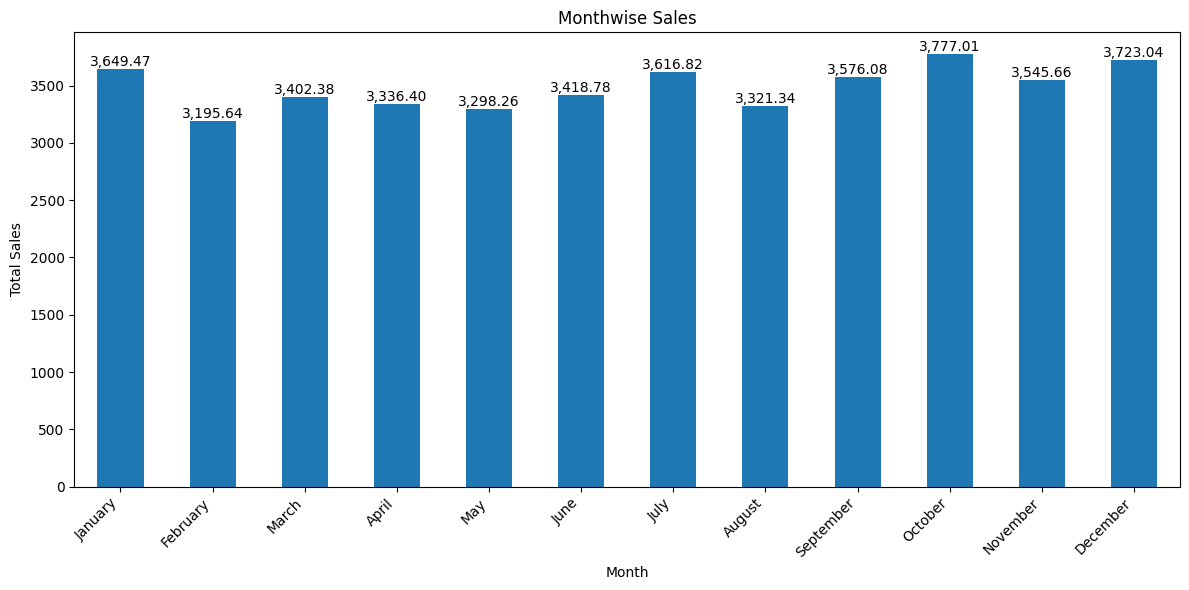

In [ ]:
cleaned_data['RunDate'] = pd.to_datetime(cleaned_data['RunDate'])
cleaned_data['Month'] = cleaned_data['RunDate'].dt.strftime('%B')
monthly_sales = cleaned_data.groupby('Month')['PRICE_CURRENT'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
ax = monthly_sales.plot(kind='bar')
plt.title('Monthwise Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='bottom') # Added the missing parenthesis here
plt.tight_layout()
plt.show()

Total Sales throughout the year is similar


<ipython-input-29-4124959862>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BRAND', y='PRICE_CURRENT', data=top_3_brands, palette='viridis')


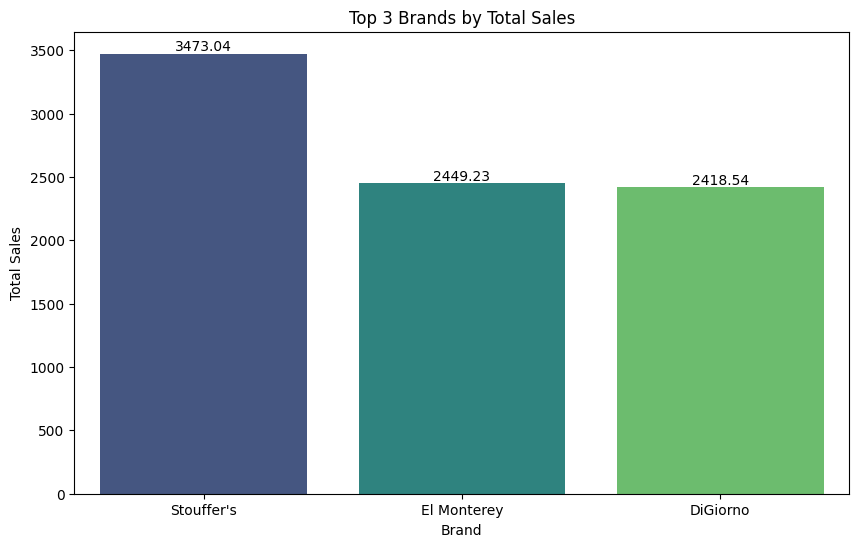

In [ ]:
brand_sales = cleaned_data.groupby('BRAND')['PRICE_CURRENT'].sum().reset_index()
top_3_brands = brand_sales.sort_values(by='PRICE_CURRENT', ascending=False).head(3)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BRAND', y='PRICE_CURRENT', data=top_3_brands, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Top 3 Brands by Total Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()

These are the Top 3 brands that were sold in the year 2022

**Summary:**
1. Dataset loaded with columns like SHIPPING_LOCATION, DEPARTMENT, CATEGORY, SKU, PRODUCT_NAME, PRICE_RETAIL, PRICE_CURRENT, Season, etc.
2. SUBCATEGORY column was completely null and was removed from the dataset.
3. Preprocessing step: Only relevant columns were kept for analysis.
4.  Fall season recorded the highest total sales, followed by Winter, Summer, and Spring.
5. Visualizations included count plots and bar charts to show sales trends across seasons and categories.
6.  Department-wise analysis revealed variations in sales across different departments.
7. Brand-level analysis was performed to assess how different brands impacted sales.

